<a href="https://colab.research.google.com/github/EchoSingh/Frame_Extraction/blob/main/FaceImageExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import cv2


In [3]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# Open the video file
video_path = "/content/gdrive/MyDrive/6994781_Cyborg_Cyber_4096x2304.mov"
cap = cv2.VideoCapture(video_path)


In [7]:
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [8]:
# Loop through the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # If faces are detected, save the frame and break the loop
    if len(faces) > 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imwrite("frame_with_face.jpg", frame)
        print("Frame with face saved.")
        break

cap.release()


Frame with face saved.


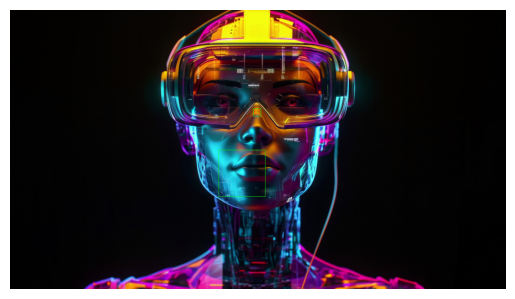

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/frame_with_face.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()